In [1]:
import torch
import torch.nn as nn
import torchvision

In [2]:
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [3]:
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [4]:
dataset = MNIST(root = 'data/', download = True)
print(len(dataset))

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:01<00:00, 8667413.68it/s] 


Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 264961.64it/s]


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 2828173.65it/s]


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw

60000


Label: 3


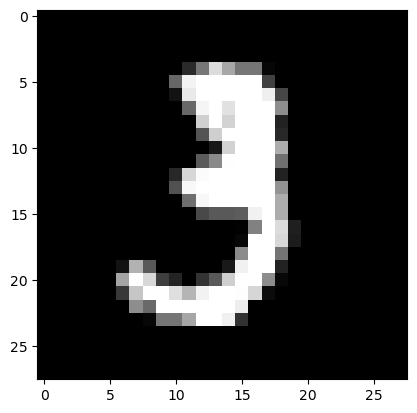

In [5]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

In [6]:
mnist_dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [7]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [8]:
print(image_tensor[:,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


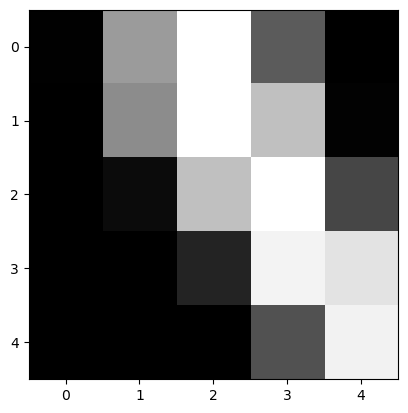

In [9]:
## Plot the image of the tensor
plt.imshow(image_tensor[0,10:15,10:15],cmap = 'gray')

In [10]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])
## Print the length of train and validation datasets
print("length of Train Datasets: ", len(train_data))
print("length of Validation Datasets: ", len(validation_data))

length of Train Datasets:  50000
length of Validation Datasets:  10000


In [11]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle = True)
val_loader = DataLoader(validation_data, batch_size, shuffle = False)

In [12]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

## Logistic regression model
model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
print(model.weight)
print(model.bias.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0008, -0.0271, -0.0145,  ..., -0.0220, -0.0233,  0.0154],
        [ 0.0060, -0.0102, -0.0183,  ...,  0.0107, -0.0342,  0.0019],
        [ 0.0225, -0.0135, -0.0077,  ..., -0.0075,  0.0197, -0.0327],
        ...,
        [-0.0139,  0.0174, -0.0237,  ...,  0.0021,  0.0221,  0.0111],
        [-0.0149, -0.0262, -0.0319,  ..., -0.0153,  0.0040,  0.0141],
        [ 0.0273,  0.0172,  0.0110,  ..., -0.0013, -0.0351,  0.0301]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([ 0.0014,  0.0229,  0.0342,  0.0037,  0.0055,  0.0037,  0.0350, -0.0032,
        -0.0205, -0.0206], requires_grad=True)


In [13]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        print(xb)
        out = self.linear(xb)
        print(out)
        return(out)

model = MnistModel()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0149, -0.0092,  0.0306,  ..., -0.0132, -0.0067, -0.0054],
         [ 0.0133, -0.0355,  0.0142,  ..., -0.0019, -0.0224, -0.0334],
         [-0.0098,  0.0132, -0.0022,  ...,  0.0203,  0.0017, -0.0217],
         ...,
         [-0.0185, -0.0021, -0.0187,  ..., -0.0045,  0.0329, -0.0316],
         [ 0.0262,  0.0169,  0.0348,  ..., -0.0188,  0.0128, -0.0017],
         [-0.0108, -0.0106,  0.0062,  ...,  0.0136,  0.0064, -0.0078]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0253,  0.0357,  0.0058,  0.0081, -0.0310, -0.0059, -0.0254, -0.0140,
         -0.0036,  0.0075], requires_grad=True)]

In [14]:
for images, labels in train_loader:
    outputs = model(images)
    break
    
print('outputs shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[-0.1316, -0.0358, -0.0087,  ...,  0.2210, -0.2390, -0.0599],
        [-0.1249,  0.0723,  0.0329,  ...,  0.1500, -0.1427,  0.3222],
        [-0.0017, -0.1909, -0.0921,  ...,  0.4441, -0.1494, -0.1593],
        ...,
        [-0.1061,  0.1446,  0.2406,  ...,  0.1742, -0.4330,  0.1634],
        [-0.0772, -0.3613, -0.1279,  ...,  0.2479, -0.5864, -0.0181],
        [-0.2229,  0.0615, -0.1580,  ...,  0.1135, -0.2648,  0.0372]],
       grad_fn=<AddmmBackward0>)
outputs shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[-0.1316, -0.0358, -0.0087,  0.0130, -0.1125, -0.1189,  0.2587,  0.2210,
         -0.2390, -0.0599],
        [-0.1249,  0.0723,  0.0329, -0.0625,  0.0610,  0.0089, -0.1175,  0.1500,
         -0.1427,  0.3222]])


In [15]:
## Apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

## chaecking at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

print("\n")
## Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())
max_probs, preds = torch.max(probs, dim = 1)
print("\n")
print(preds)
print("\n")
print(max_probs)

Sample probabilities:
 tensor([[0.0886, 0.0975, 0.1001, 0.1023, 0.0903, 0.0897, 0.1308, 0.1260, 0.0795,
         0.0951],
        [0.0857, 0.1044, 0.1003, 0.0912, 0.1032, 0.0980, 0.0863, 0.1128, 0.0842,
         0.1340]])


Sum:  0.9999999403953552


tensor([6, 9, 7, 7, 6, 6, 7, 7, 7, 7, 7, 2, 7, 6, 9, 4, 7, 7, 7, 6, 7, 1, 6, 4,
        6, 2, 6, 7, 4, 6, 6, 7, 9, 3, 7, 4, 7, 6, 2, 7, 7, 7, 6, 7, 7, 6, 7, 7,
        6, 6, 7, 6, 7, 7, 7, 7, 5, 6, 9, 3, 2, 7, 7, 7, 1, 7, 3, 6, 6, 0, 7, 7,
        3, 1, 4, 6, 7, 7, 6, 7, 9, 6, 6, 3, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 3,
        6, 6, 7, 7, 7, 6, 3, 7, 7, 6, 6, 7, 1, 7, 6, 7, 7, 7, 3, 7, 7, 2, 7, 7,
        7, 7, 3, 3, 7, 4, 7, 7])


tensor([0.1308, 0.1340, 0.1570, 0.1625, 0.1331, 0.1245, 0.1238, 0.1444, 0.1439,
        0.1536, 0.1410, 0.1155, 0.1282, 0.1376, 0.1179, 0.1359, 0.1324, 0.1524,
        0.1341, 0.1352, 0.1277, 0.1297, 0.1171, 0.1289, 0.1470, 0.1244, 0.1141,
        0.1270, 0.1310, 0.1310, 0.1366, 0.1620, 0.1411, 0.1275, 0.1222, 0.

In [16]:
labels

tensor([1, 0, 7, 7, 1, 4, 1, 3, 8, 7, 5, 1, 1, 8, 9, 0, 9, 7, 7, 5, 1, 0, 9, 0,
        2, 0, 8, 1, 0, 2, 0, 7, 8, 0, 1, 2, 1, 0, 5, 8, 4, 7, 2, 9, 9, 2, 9, 4,
        6, 6, 9, 0, 4, 2, 7, 1, 0, 6, 7, 0, 2, 8, 8, 4, 3, 3, 6, 3, 3, 0, 9, 0,
        9, 8, 5, 6, 8, 4, 2, 9, 8, 1, 9, 4, 8, 1, 8, 9, 8, 1, 7, 5, 3, 2, 2, 1,
        9, 8, 2, 7, 4, 6, 4, 9, 8, 1, 0, 7, 3, 7, 2, 0, 2, 5, 0, 3, 7, 5, 5, 7,
        0, 8, 6, 4, 1, 8, 9, 5])

In [17]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return(torch.tensor(torch.sum(preds == labels).item()/ len(preds)))

print("Accuracy: ",accuracy(outputs, labels))
print("\n")
loss_fn = F.cross_entropy
print("Loss Function: ",loss_fn)
print("\n")
## Loss for the current batch
loss = loss_fn(outputs, labels)
print(loss)

Accuracy:  tensor(0.1719)


Loss Function:  <function cross_entropy at 0x00000235805AD120>


tensor(2.3034, grad_fn=<NllLossBackward0>)


In [18]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return(out)
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        return(loss)
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return({'val_loss':loss, 'val_acc': acc})
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return({'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()})
    
    def epoch_end(self, epoch,result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        
    
model = MnistModel()

In [19]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return(model.validation_epoch_end(outputs))

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        ## Training Phas
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        ## Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return(history)

In [20]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.319078207015991, 'val_acc': 0.12351661175489426}

In [21]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9512, val_acc: 0.5973
Epoch [1], val_loss: 1.6815, val_acc: 0.7392
Epoch [2], val_loss: 1.4797, val_acc: 0.7733
Epoch [3], val_loss: 1.3271, val_acc: 0.7915
Epoch [4], val_loss: 1.2098, val_acc: 0.8024


In [22]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1178, val_acc: 0.8142
Epoch [1], val_loss: 1.0440, val_acc: 0.8207
Epoch [2], val_loss: 0.9837, val_acc: 0.8251
Epoch [3], val_loss: 0.9336, val_acc: 0.8297
Epoch [4], val_loss: 0.8913, val_acc: 0.8327


In [23]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8551, val_acc: 0.8355
Epoch [1], val_loss: 0.8238, val_acc: 0.8375
Epoch [2], val_loss: 0.7963, val_acc: 0.8400
Epoch [3], val_loss: 0.7721, val_acc: 0.8425
Epoch [4], val_loss: 0.7506, val_acc: 0.8437


In [24]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7312, val_acc: 0.8453
Epoch [1], val_loss: 0.7138, val_acc: 0.8471
Epoch [2], val_loss: 0.6980, val_acc: 0.8490
Epoch [3], val_loss: 0.6836, val_acc: 0.8512
Epoch [4], val_loss: 0.6704, val_acc: 0.8525


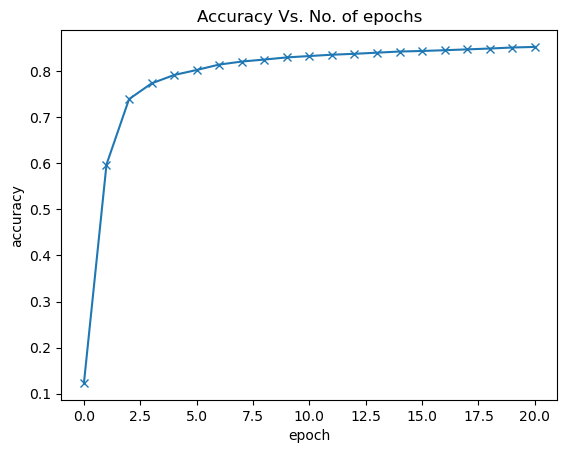

In [25]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Vs. No. of epochs')
plt.show()

In [26]:
## Define the test dataset
test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())

shape:  torch.Size([1, 28, 28])
Label:  7


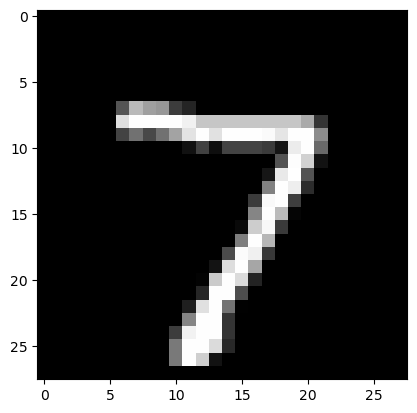

In [27]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print("shape: ", img.shape)
print('Label: ', label)

In [28]:
print(img.unsqueeze(0).shape)
print(img.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 28, 28])


In [29]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return(preds[0].item())

Label: 7 , Predicted : 7


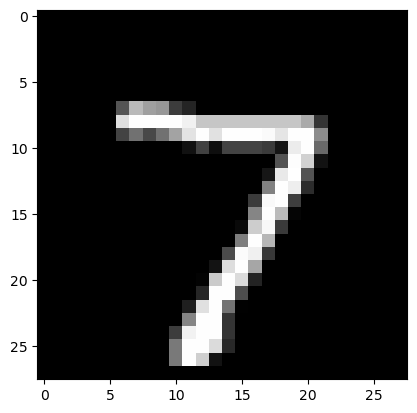

In [30]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, ', Predicted :', predict_image(img, model))

Label: 9 ,Predicted: 9


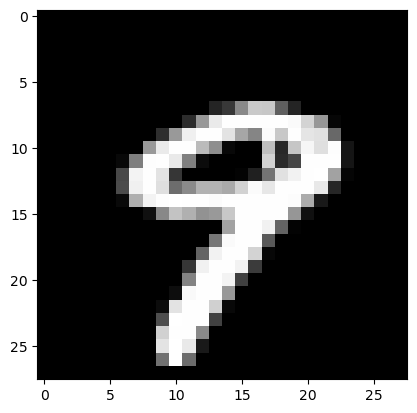

In [31]:
img, label = test_dataset[9]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

Label: 0 ,Predicted: 0


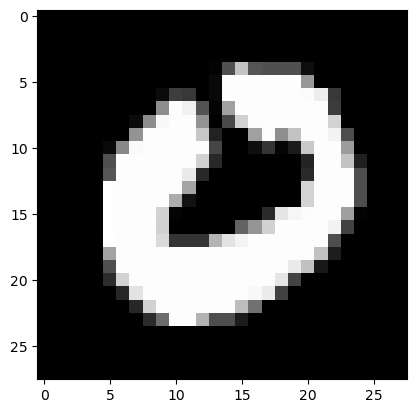

In [32]:
img, label = test_dataset[25]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

Label: 3 ,Predicted: 3


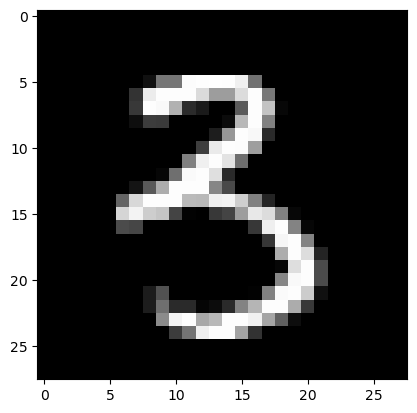

In [33]:
img, label = test_dataset[5000]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

In [34]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6409655213356018, 'val_acc': 0.8628906011581421}

In [35]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [36]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0245, -0.0145,  0.0309,  ...,  0.0165,  0.0179,  0.0168],
                      [-0.0217,  0.0144, -0.0174,  ...,  0.0156, -0.0036,  0.0246],
                      [-0.0011,  0.0197, -0.0018,  ...,  0.0236,  0.0066,  0.0116],
                      ...,
                      [-0.0114, -0.0274,  0.0030,  ..., -0.0082, -0.0319, -0.0276],
                      [ 0.0217, -0.0202, -0.0103,  ..., -0.0023, -0.0246,  0.0126],
                      [-0.0029,  0.0308, -0.0017,  ..., -0.0141,  0.0233, -0.0136]])),
             ('linear.bias',
              tensor([-0.0157,  0.0702, -0.0017,  0.0042,  0.0453,  0.0471, -0.0377,  0.0636,
                      -0.0553, -0.0367]))])

In [37]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

C:\Users\goose\AppData\Local\Temp\ipykernel_2720\3772469117.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('mnist-logistic.pth'))


OrderedDict([('linear.weight',
              tensor([[ 0.0245, -0.0145,  0.0309,  ...,  0.0165,  0.0179,  0.0168],
                      [-0.0217,  0.0144, -0.0174,  ...,  0.0156, -0.0036,  0.0246],
                      [-0.0011,  0.0197, -0.0018,  ...,  0.0236,  0.0066,  0.0116],
                      ...,
                      [-0.0114, -0.0274,  0.0030,  ..., -0.0082, -0.0319, -0.0276],
                      [ 0.0217, -0.0202, -0.0103,  ..., -0.0023, -0.0246,  0.0126],
                      [-0.0029,  0.0308, -0.0017,  ..., -0.0141,  0.0233, -0.0136]])),
             ('linear.bias',
              tensor([-0.0157,  0.0702, -0.0017,  0.0042,  0.0453,  0.0471, -0.0377,  0.0636,
                      -0.0553, -0.0367]))])

In [38]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6409655213356018, 'val_acc': 0.8628906011581421}

In [39]:

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))



class MnistMLP(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128), 
            nn.ReLU(),
            nn.Linear(128, 64),    
            nn.ReLU(),
            nn.Linear(64, 10)      
        )
        
    def forward(self, xb):
        return self.network(xb)



class MnistCNN(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # Вход: 1 x 28 x 28
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # Стало: 32 x 14 x 14

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # Стало: 64 x 7 x 7

            nn.Flatten(), 
            nn.Linear(64*7*7, 128), # 64 канала * 7 * 7 пикселей
            nn.ReLU(),
            nn.Linear(128, 10)
        )
        
    def forward(self, xb):
        return self.network(xb)



In [40]:


print("=== Обучаем MLP (Продвинутая обычная) ===")
model_mlp = MnistMLP()
history_mlp = fit(5, 0.001, model_mlp, train_loader, val_loader)

print("\n=== Обучаем CNN (Сверточная - должна быть мощной) ===")
model_cnn = MnistCNN()
history_cnn = fit(5, 0.001, model_cnn, train_loader, val_loader)



=== Обучаем MLP (Продвинутая обычная) ===
Epoch [0], val_loss: 2.2989, val_acc: 0.1442
Epoch [1], val_loss: 2.2888, val_acc: 0.2156
Epoch [2], val_loss: 2.2784, val_acc: 0.2978
Epoch [3], val_loss: 2.2667, val_acc: 0.3673
Epoch [4], val_loss: 2.2528, val_acc: 0.4142

=== Обучаем CNN (Сверточная - должна быть мощной) ===
Epoch [0], val_loss: 2.2704, val_acc: 0.2901
Epoch [1], val_loss: 2.2298, val_acc: 0.5155
Epoch [2], val_loss: 2.1622, val_acc: 0.5534
Epoch [3], val_loss: 2.0341, val_acc: 0.6115
Epoch [4], val_loss: 1.7768, val_acc: 0.6830


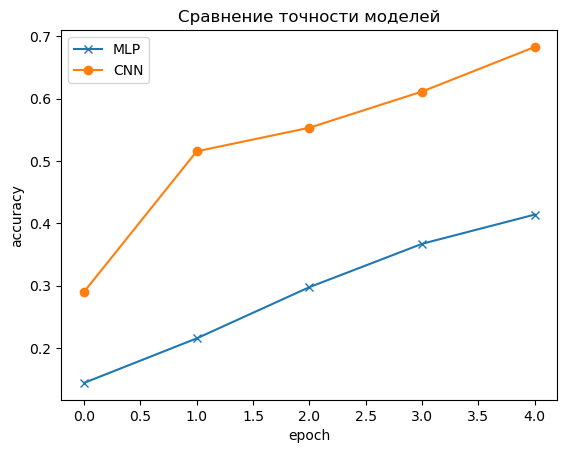

In [41]:

plt.plot([x['val_acc'] for x in history_mlp], '-x', label='MLP')
plt.plot([x['val_acc'] for x in history_cnn], '-o', label='CNN')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Сравнение точности моделей')
plt.show()

In [42]:
torch.save(model_mlp.state_dict(), 'mnist-mlp.pth')
torch.save(model_cnn.state_dict(), 'mnist-cnn.pth')